In [1]:
plot_expert_trajectory = True

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def curvy_func(x):
    return np.sin(x)

In [4]:
road_stepsize = 0.1
agent_stepsize = 0.5
ratio = agent_stepsize / road_stepsize
assert ratio == int(ratio)
ratio = int(ratio)

In [5]:
xs = np.arange(0, 10 * 2 * np.pi, road_stepsize)
xs_step = np.arange(0, 9 * 2 * np.pi, agent_stepsize)
ys = curvy_func(xs)

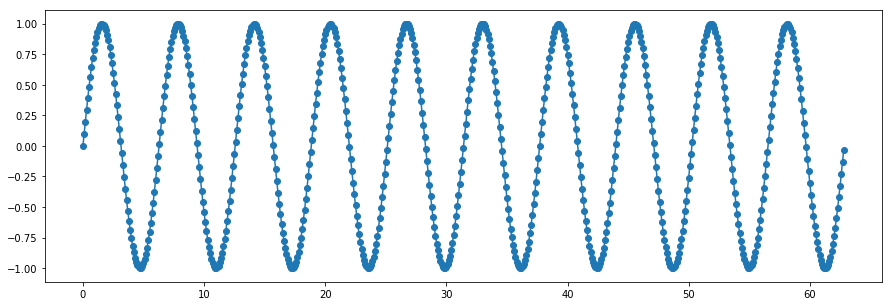

In [6]:
plt.figure(figsize=(15, 5))
plt.scatter(xs, ys)
plt.plot(xs, ys)
plt.show()

In [7]:
stepsize=0.05

In [8]:
y_bins = np.arange(-3, 3+stepsize, stepsize)

In [9]:
entire_traj = np.zeros((len(xs), len(y_bins)))
print(entire_traj.shape)

(629, 121)


In [10]:
# create road
for i, x in enumerate(xs):
    for j in range(len(y_bins) - 1):
        if curvy_func(x) >= y_bins[j] and curvy_func(x) < y_bins[j+1]:
            entire_traj[i][j-10:j+10] = 1
            break

In [11]:
# create labels
states = []
for i, x in enumerate(xs_step):
    for j in range(len(y_bins) - 1):
        if curvy_func(x) >= y_bins[j] and curvy_func(x) < y_bins[j+1]:
            if plot_expert_trajectory:
                entire_traj[i*ratio, j] = 10
            states.append([i*ratio, j])
            break
states = np.array(states)

In [12]:
# compute x distance between two consecutive states: ratio
# compute width or at least set it using a heuristic: 
y_step_max = np.max(states[:,1][1:] - states[:,1][:-1])

In [13]:
def get_obs(agent_coord):
    x, y = agent_coord
    return entire_traj[x:x+ratio, y-2*y_step_max:y+2*y_step_max]

(5, 40)


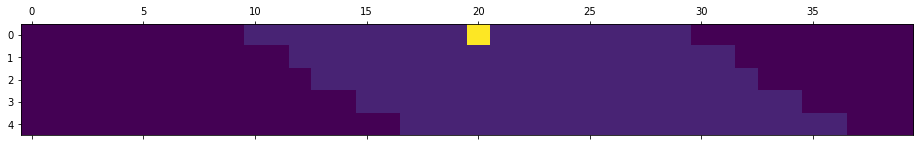

In [14]:
plt.matshow(get_obs(states[11]))
print(get_obs(states[0]).shape)
plt.show()

In [15]:
observations = []
for state in states[:-1]:
    observations.append(get_obs(state))
observations = np.array(observations)
print(observations.shape)

(113, 5, 40)


In [16]:
actions = states[1:] - states[:-1]
print(actions.shape)

(113, 2)


In [19]:
import json
with open('pseudo_driving_dataset.json', 'w+') as json_f:
    json.dump([observations.tolist(), actions.tolist()], json_f)

In [17]:
actions[:10]

array([[  5,   9],
       [  5,   7],
       [  5,   3],
       [  5,  -1],
       [  5,  -7],
       [  5,  -9],
       [  5, -10],
       [  5,  -8],
       [  5,  -4],
       [  5,   0]])

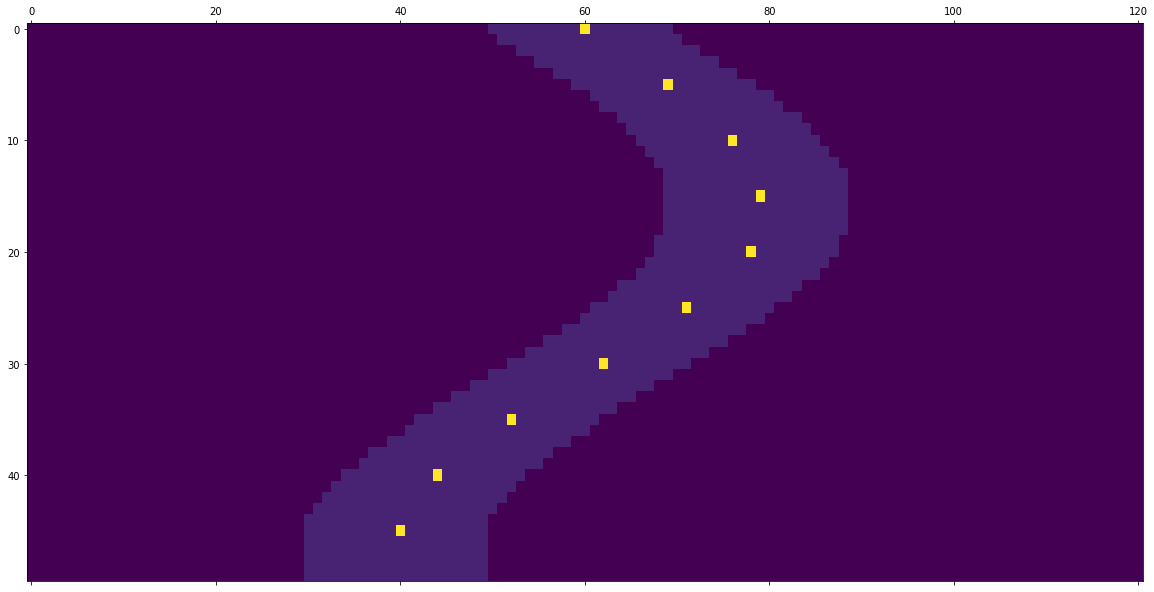

In [18]:
plt.figure(figsize=(20, 10))
plt.matshow(entire_traj[:50], fignum=1, aspect='auto')
plt.show()